<a href="https://colab.research.google.com/github/Namesakenberg/machine_learning/blob/main/Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('/content/Iris.csv')

In [71]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [73]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [74]:
df = df[df['Species']!=0][['SepalWidthCm','PetalLengthCm','Species']]

In [75]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [76]:
# using only 10 rows for training

df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val  = df.iloc[60:80 , :].sample(5)
df_test = df.iloc[:80 , :].sample(5)

In [77]:
df_train

,SepalWidthCm,PetalLengthCm,Species
63,2.9,4.7,1
136,3.4,5.6,2
58,2.9,4.6,1
141,3.1,5.1,2
54,2.8,4.6,1
112,3.0,5.5,2
144,3.3,5.7,2
102,3.0,5.9,2
56,3.3,4.7,1
107,2.9,6.3,2


In [78]:
df_val

,SepalWidthCm,PetalLengthCm,Species
93,2.3,3.3,1
75,3.0,4.4,1
80,2.4,3.8,1
117,3.8,6.7,2
145,3.0,5.2,2


In [79]:
df_test

,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
98,2.5,3.0,1
87,2.3,4.4,1
62,2.2,4.0,1
54,2.8,4.6,1


In [51]:
# test on the validation set
X_test = df_val.iloc[:,0:2].values    # X  = sepal width and petaal length
y_test = df_val.iloc[:,-1].values     # y  = species

# Bagging

In [85]:
df_bag = df_train.sample(8,replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
102,3.0,5.9,2
102,3.0,5.9,2
136,3.4,5.6,2
63,2.9,4.7,1
102,3.0,5.9,2
63,2.9,4.7,1
136,3.4,5.6,2


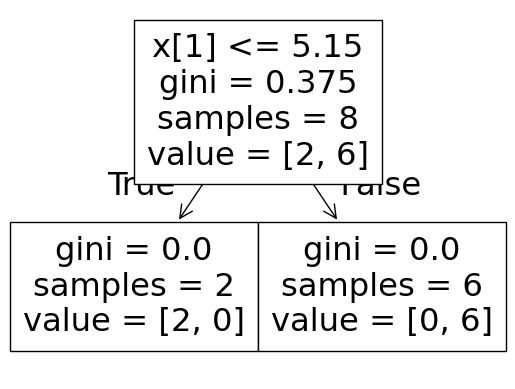

0.8


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


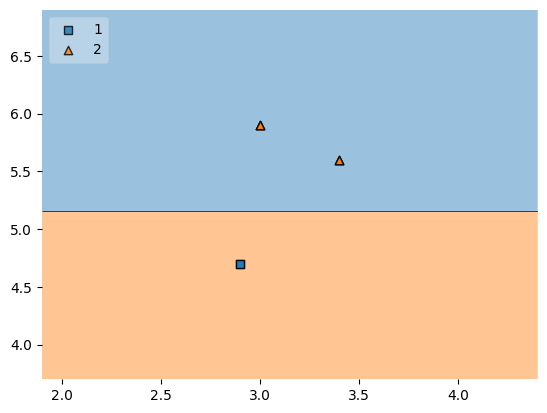

In [86]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score


dt_bag1 = DecisionTreeClassifier()

def evaluate(clf,X,y):
  clf.fit(X,y)
  plot_tree(clf)
  plt.show()
  plot_decision_regions(X.values , y.values , clf=clf , legend=2)
  y_pred = clf.predict(X_test)
  print(accuracy_score(y_test , y_pred))

evaluate(dt_bag1 , X,y)

In [88]:
 # again
df_bag_2= df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

print(df_bag_2)


     SepalWidthCm  PetalLengthCm  Species
63            2.9            4.7        1
54            2.8            4.6        1
63            2.9            4.7        1
112           3.0            5.5        2
107           2.9            6.3        2
58            2.9            4.6        1
56            3.3            4.7        1
144           3.3            5.7        2


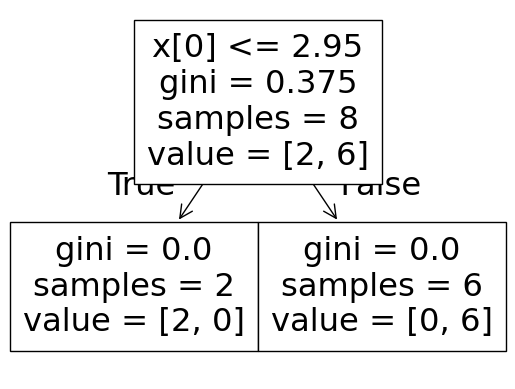

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


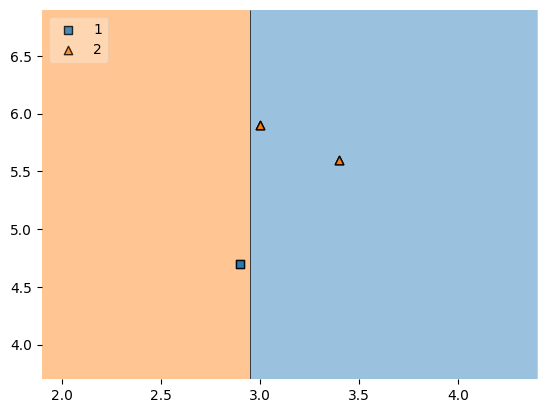

In [89]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [90]:
df_bag_3 = df_train.sample(8,replace=True)
X = df_bag_3.iloc[:,0:2]
y = df_bag_3.iloc[:,-1]

df_bag_3

,SepalWidthCm,PetalLengthCm,Species
56,3.3,4.7,1
107,2.9,6.3,2
141,3.1,5.1,2
107,2.9,6.3,2
58,2.9,4.6,1
136,3.4,5.6,2
56,3.3,4.7,1
136,3.4,5.6,2


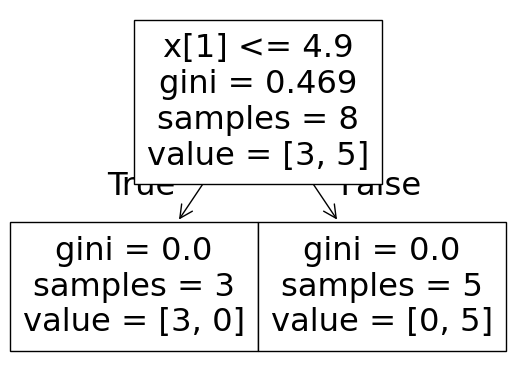

1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


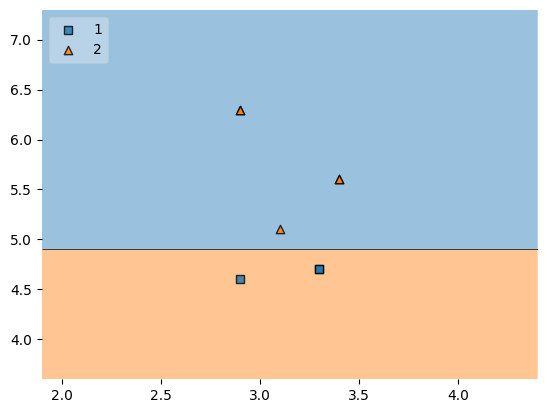

In [91]:
dt_bag_3 = DecisionTreeClassifier()
evaluate(dt_bag_3 , X,y)

#Predict

In [95]:
df_test

,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
98,2.5,3.0,1
87,2.3,4.4,1
62,2.2,4.0,1
54,2.8,4.6,1


In [96]:
print("predictor_1",dt_bag1.predict(np.array([3.4,5.6]).reshape(1,2)))
print("predictor_2",dt_bag1.predict(np.array([3.4,5.6]).reshape(1,2)))
print("predictor_3",dt_bag1.predict(np.array([3.4,5.6]).reshape(1,2)))

predictor_1 [2]
predictor_2 [2]
predictor_3 [2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
